# MVA 2021-22  - TP 1 

To download this notebook:

http://geometrica.saclay.inria.fr/team/Fred.Chazal/MVA2024.html

You can install gudhi using pip or conda:

https://gudhi.inria.fr/


In [1]:
import gudhi as gd
print(gd.__version__)

ModuleNotFoundError: No module named 'gudhi'

The goal of this first TP is to get you familiar with the basic data structures in GUDHI to  build and manipulate simplicial complexes and filtrations. 

# Simplicial complexes and simplex trees

In Gudhi, (filtered) simplicial complexes are encoded through a data structure called simplex tree. Here is a very simple example illustrating the use of simplex tree to represent simplicial complexes. See the Gudhi documentation for a complete list of functionalities. Try the following code and a few other functionalities from the documentation to get used to the Simplex Tree data structure.

In [2]:
import numpy as np
import gudhi as gd
import random as rd
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm

%matplotlib inline
#%matplotlib notebook

In [3]:
st = gd.SimplexTree() # Create an empty simplicial complex

# Simplicies can be inserted 1 by 1
# Vertices are indexed by integers
if st.insert([0,1]):
    print("First simplex inserted!")
st.insert([1,2])
st.insert([2,3])
st.insert([3,0])
st.insert([0,2])
st.insert([3,1])

First simplex inserted!


True

In [4]:
L = st.get_filtration() # Get a list with all simplices
# Notice that inserting an edge automatically inserts its vertices, if they were not already in the complex
for simplex in L:
    print(simplex)

([0], 0.0)
([1], 0.0)
([0, 1], 0.0)
([2], 0.0)
([0, 2], 0.0)
([1, 2], 0.0)
([3], 0.0)
([0, 3], 0.0)
([1, 3], 0.0)
([2, 3], 0.0)


In [5]:
# Insert the 2-skeleton, giving some filtration values to the faces
st.insert([0,1,2],filtration=0.1)
st.insert([1,2,3],filtration=0.2)
st.insert([0,2,3],filtration=0.3)
st.insert([0,1,3],filtration=0.4)

st.insert([0,1,2,3],filtration=0.5)

# If you add a new simplex with a given filtration value, all its faces that 
# were not in the complex are inserted with the same filtration value
st.insert([2,3,4],filtration=0.7)
L = st.get_filtration()
for simplex in L:
    print(simplex)

([0], 0.0)
([1], 0.0)
([0, 1], 0.0)
([2], 0.0)
([0, 2], 0.0)
([1, 2], 0.0)
([3], 0.0)
([0, 3], 0.0)
([1, 3], 0.0)
([2, 3], 0.0)
([0, 1, 2], 0.1)
([1, 2, 3], 0.2)
([0, 2, 3], 0.3)
([0, 1, 3], 0.4)
([0, 1, 2, 3], 0.5)
([4], 0.7)
([2, 4], 0.7)
([3, 4], 0.7)
([2, 3, 4], 0.7)


The filtration value of a simplex can be changed in the following way

In [6]:
st.assign_filtration((2,3,4),1.0)

L = st.get_filtration()
for simplex in L:
    print(simplex)

([0], 0.0)
([1], 0.0)
([0, 1], 0.0)
([2], 0.0)
([0, 2], 0.0)
([1, 2], 0.0)
([3], 0.0)
([0, 3], 0.0)
([1, 3], 0.0)
([2, 3], 0.0)
([0, 1, 2], 0.1)
([1, 2, 3], 0.2)
([0, 2, 3], 0.3)
([0, 1, 3], 0.4)
([0, 1, 2, 3], 0.5)
([4], 0.7)
([2, 4], 0.7)
([3, 4], 0.7)
([2, 3, 4], 1.0)


** Warning! ** Take care that after changing the filtration value of a simplex, the result could no longer be a filtration, as illustrated below :

In [7]:
print("Giving the edge [3,4] the value 1.5:")
st.assign_filtration((3,4),1.5)
L = st.get_filtration()
for simplex in L:
    print(simplex)
print("The result is no longer a filtration : [3,4] has a higher value than its coface [2,3,4]")
print("To fix the problem, use make_filtration_non_decreasing()")
st.make_filtration_non_decreasing()
L = st.get_filtration()
for simplex in L:
    print(simplex)

Giving the edge [3,4] the value 1.5:
([0], 0.0)
([1], 0.0)
([0, 1], 0.0)
([2], 0.0)
([0, 2], 0.0)
([1, 2], 0.0)
([3], 0.0)
([0, 3], 0.0)
([1, 3], 0.0)
([2, 3], 0.0)
([0, 1, 2], 0.1)
([1, 2, 3], 0.2)
([0, 2, 3], 0.3)
([0, 1, 3], 0.4)
([0, 1, 2, 3], 0.5)
([4], 0.7)
([2, 4], 0.7)
([2, 3, 4], 1.0)
([3, 4], 1.5)
The result is no longer a filtration : [3,4] has a higher value than its coface [2,3,4]
To fix the problem, use make_filtration_non_decreasing()
([0], 0.0)
([1], 0.0)
([0, 1], 0.0)
([2], 0.0)
([0, 2], 0.0)
([1, 2], 0.0)
([3], 0.0)
([0, 3], 0.0)
([1, 3], 0.0)
([2, 3], 0.0)
([0, 1, 2], 0.1)
([1, 2, 3], 0.2)
([0, 2, 3], 0.3)
([0, 1, 3], 0.4)
([0, 1, 2, 3], 0.5)
([4], 0.7)
([2, 4], 0.7)
([3, 4], 1.5)
([2, 3, 4], 1.5)


In [8]:
# Many operations can be done on simplicial complexes, see also the Gudhi documentation and examples
print("dimension=",st.dimension())
print("filtration value of [1,2]=",st.filtration([1,2]))
print("filtration value of [4,2]=",st.filtration([4,2]))
print("num_simplices=", st.num_simplices())
print("num_vertices=", st.num_vertices())
print("skeleton[2]=", st.get_skeleton(2))
print("skeleton[1]=", st.get_skeleton(1))
print("skeleton[0]=", st.get_skeleton(0))
L = st.get_skeleton(1)
for simplex in L:
    print(simplex)

dimension= 3
filtration value of [1,2]= 0.0
filtration value of [4,2]= 0.7
num_simplices= 19
num_vertices= 5
skeleton[2]= <_cython_3_0_7.generator object at 0x000001B5B61EBAC0>
skeleton[1]= <_cython_3_0_7.generator object at 0x000001B5B61EBAC0>
skeleton[0]= <_cython_3_0_7.generator object at 0x000001B5B61EBAC0>
([0, 1], 0.0)
([0, 2], 0.0)
([0, 3], 0.0)
([0], 0.0)
([1, 2], 0.0)
([1, 3], 0.0)
([1], 0.0)
([2, 3], 0.0)
([2, 4], 0.7)
([2], 0.0)
([3, 4], 1.5)
([3], 0.0)
([4], 0.7)


## Exercise 1. 
Make a few experiments with the simplex tree functions ( https://gudhi.inria.fr/python/latest/simplex_tree_ref.html ), e.g. changing the filtrations values, trying to assign values to simplices that do not lead to a filtration,... And observe the effects on the filtration. 

# Filtrations, persistence and Betti numbers computation

In [9]:
# As an example, we assign to each simplex its dimension as filtration value
for splx in st.get_filtration():
    st.assign_filtration(splx[0],len(splx[0])-1)
L = st.get_filtration()
for simplex in L:
    print(simplex)

([0], 0.0)
([1], 0.0)
([2], 0.0)
([3], 0.0)
([4], 0.0)
([0, 1], 1.0)
([0, 2], 1.0)
([1, 2], 1.0)
([0, 3], 1.0)
([1, 3], 1.0)
([2, 3], 1.0)
([2, 4], 1.0)
([3, 4], 1.0)
([0, 1, 2], 2.0)
([0, 1, 3], 2.0)
([0, 2, 3], 2.0)
([1, 2, 3], 2.0)
([2, 3, 4], 2.0)
([0, 1, 2, 3], 3.0)


Before computing Betti numbers, we first need to compute persistence of the filtration. 

In [10]:
# To compute the persistence diagram of the filtered complex
# By default it stops at dimension-1, use persistence_dim_max=True
# to compute homology in all dimensions
## Here, for the moment, we use it as a preprocessing step to compute Betti numbers. 
diag = st.persistence(persistence_dim_max=True)
# Display each interval as (dimension, (birth, death))
print(diag)

[(2, (2.0, 3.0)), (1, (1.0, 2.0)), (1, (1.0, 2.0)), (1, (1.0, 2.0)), (1, (1.0, 2.0)), (0, (0.0, inf)), (0, (0.0, 1.0)), (0, (0.0, 1.0)), (0, (0.0, 1.0)), (0, (0.0, 1.0))]


In [11]:
print(st.betti_numbers())

[1, 0, 0, 0]


## Exercise 2. 
Define another filtration of the simplicial complex and check that the choice of the filtration does not change the betti numbers.

## Exercise 3. Persistence for functions defined over a grid
When a function is defined over a grid on $[0,1]$, $[0,1]^2$, ... the grid can be directly used to build the filtration using a cubical complex as illustrated in the following examples. 

### Persistence of 1D function

Let consider $f: t \mapsto sin(2t)+sin(3t)$ defined over $[0, 2\pi]$. 

Build a table with 200 values of f between 0 and $2\pi$. Plot the function, compute the persistence diagram of its sublevelsets, and draw its persistence diagram.

##### Remark:
The name top_dimensional_cells is because gudhi gives the grid values to top-dimensional cells and deduces values for other cells, instead of giving values to vertices and deducing values for other cells. 

### Persistence of 2D function

Let $p_0=(0.25, 0.25), p_1=(0.75, 0.75), p_2 = (0.0, 1.0)$ and $p_3 = (1.0, 0.0)$ be 4 points in the plane $\mathbb{R}^2$ and $\sigma=0.05$.
1. Build on such a complex the sublevelset filtration of the function 
$$f(p)=\exp(-\frac{\|p-p_0\|^2}{\sigma})+3\exp(-\frac{\|p-p_1\|^2}{\sigma}) - 4*\exp(-\frac{\|p-p_2\|^2}{\sigma}) 
- 2 \exp(-\frac{\|p-p_3\|^2}{\sigma})$$ 
defined over $[-0.5,1.5]^2$.

Compute the persistence diagram of the sublevel set filtration of $f$ and compute the persistence diagram of the upperlevel set filtration of $f$ and compare the obtained diagram to the previous one. 

## Persistence over a filtered simplicial complex and Betti number. 
1. Recall the torus is homeomorphic to the surface obtained by identifying the opposite sides of a square as illustrated below. ![Figure 1](TorusTriangle.PNG) Using Gudhi, construct a triangulation (2-dimensional simplicial complex) of the Torus. Define a filtration on it, compute its persistence and use it to deduce the Betti numbers of the torus.
2. Use Gudhi to compute the Betti numbers of a sphere of dimension 2 and of a sphere of dimension 3 (hint: the k -dimensional sphere is homeomorphic to the boundary of a (k+1)-dimensional simplex.

# Vietoris-Rips and alpha-complex filtrations

For the definition of Vietoris-Rips and $\alpha$-complexes, see the slides of the course: https://geometrica.saclay.inria.fr/team/Fred.Chazal/slides/Persistence2022.pdf

See also the following book, p.137
https://hal.inria.fr/hal-01615863v2/document

Take care that in GUDHI the α-complex filtration is indexed by the square of the radius of the smallest empty circumscribing ball. 

These are basic instructions to build Vietoris-Rips and α-complex filtrations (and compute their persistent homology).

##### Random point cloud

In [25]:
#Create a random point cloud in 3D
nb_pts=100
pt_cloud = np.random.rand(nb_pts,3)

Number of simplices in the V-R complex:  40830


<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

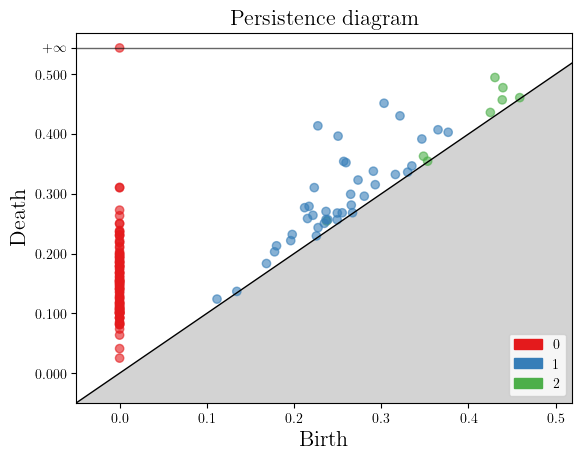

In [27]:
#Build Rips-Vietoris filtration and compute its persistence diagram
rips_complex1 = gd.RipsComplex(points=pt_cloud,max_edge_length=0.5)
simplex_tree = rips_complex1.create_simplex_tree(max_dimension=3)
print("Number of simplices in the V-R complex: ",simplex_tree.num_simplices())
dgm = simplex_tree.persistence(homology_coeff_field=2, min_persistence=0)
gd.plot_persistence_diagram(dgm)

<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

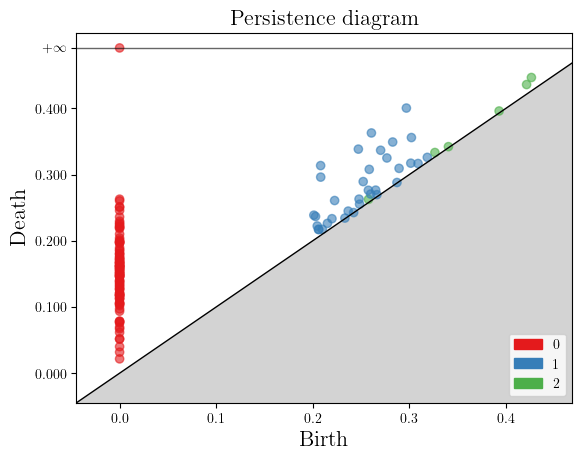

In [14]:
#Compute Rips-Vietoris filtration and compute its persistence diagram from
#a pairwise distance matrix
dist_mat = []
for i in range(nb_pts):
    ld = []
    for j in range(i):
        ld.append(np.linalg.norm(pt_cloud[i,:]-pt_cloud[j,:]))
    dist_mat.append(ld)
rips_complex2 = gd.RipsComplex(distance_matrix=dist_mat,max_edge_length=0.5)
simplex_tree2 = rips_complex2.create_simplex_tree(max_dimension=3)
diag2 = simplex_tree2.persistence(homology_coeff_field=2, min_persistence=0)
gd.plot_persistence_diagram(diag2)

Number of simplices in the alpha-complex:  2363


<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

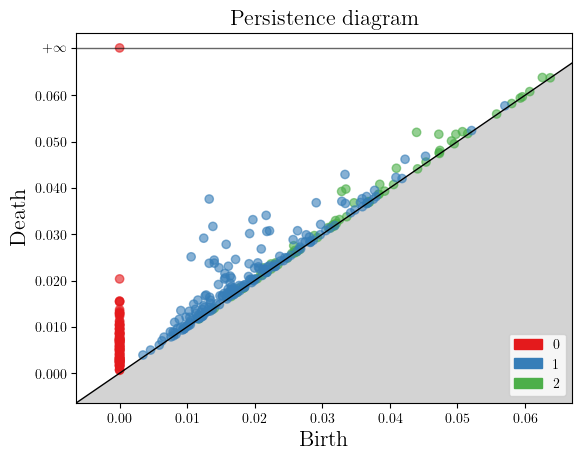

In [20]:
#Compute the alpha-complex filtration and compute its persistence
alpha_complex = gd.AlphaComplex(points=pt_cloud)
simplex_tree3 = alpha_complex.create_simplex_tree()
print("Number of simplices in the alpha-complex: ",simplex_tree3.num_simplices())
diag3 = simplex_tree3.persistence(homology_coeff_field=2, min_persistence=0)
gd.plot_persistence_diagram(diag3)

### Exercise 4.  Sampled torus in $\mathbb{R}^4$

+ Randomly sample $n$ points (try different values of $n$) on the paramatrized torus in $\mathbb{R}^4$:

$$(s,t) \to (\cos(s),\sin(s),\cos(t),\sin(t)), \ \  \ (s,t) \in [0,2\pi] \times [0,2\pi]$$

and compute the persistence diagrams of the resulting $\alpha$-complex filtration. 

+ Do the same with the Vietoris-Rips complex. 

+ What do you observe?

+ Now, sample the points along a 1D line embedded in the torus according to the following parametrization:

$$t \to (\cos(t),\sin(t),\cos(5t),\sin(5t)), \ \  \ t \in [0,2\pi] $$

and do the same experiment as previously. What do you observe? Explain it. 

## Exercise 5. 
+ Randomly sample n = 100 points on the unit circle in the Euclidean plane.
+ For R in np.arange(0.0,0.5,0.01), compute the Betti numbers of the subcomplex of the Rips-Vietoris filtration (up to dimension 2) made of the simplices with index value at most R and plot the curve giving the Betti numbers as functions of R. These curves are called the Betti curves of the filtration. 
+ Can we get the same curves directly from the persistence diagram of the Rips-Vietoris filtration (you will have to guess what the persistence diagrams represent)? If so, compute them using the persistence diagram. 
+ Same questions using the α-complex filtrations (find a right range of values for α), and try to increase the number of points in the initial point cloud. 
+ Do the same for the point cloud sampled on the 2D torus in $\mathbb{R}^4$ from the above exercise. 